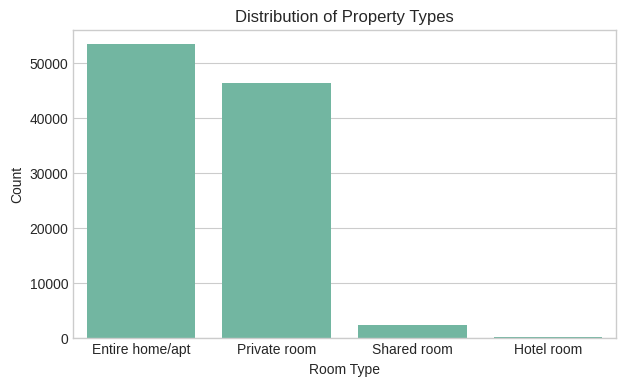

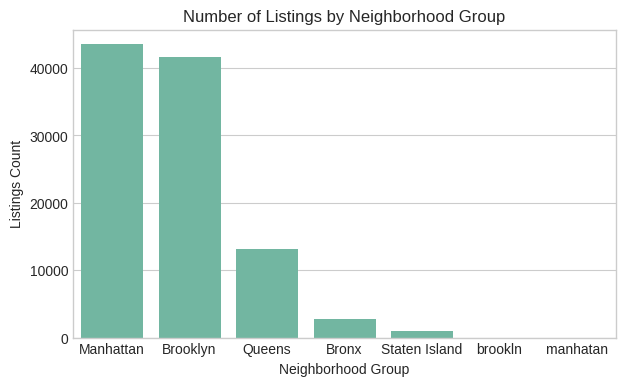

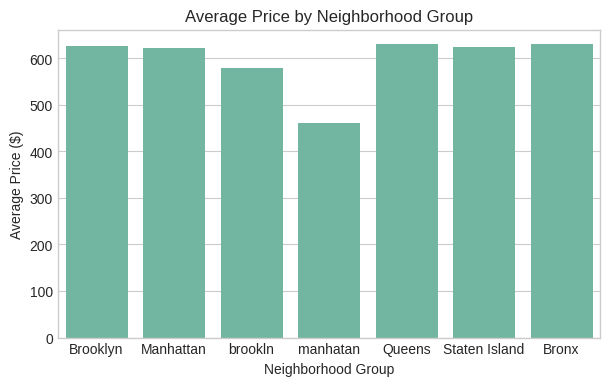

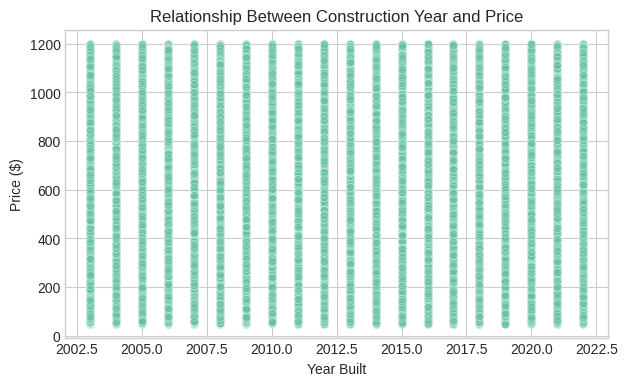

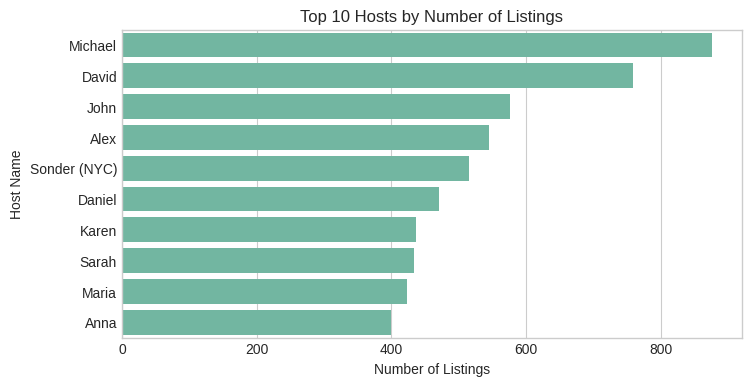

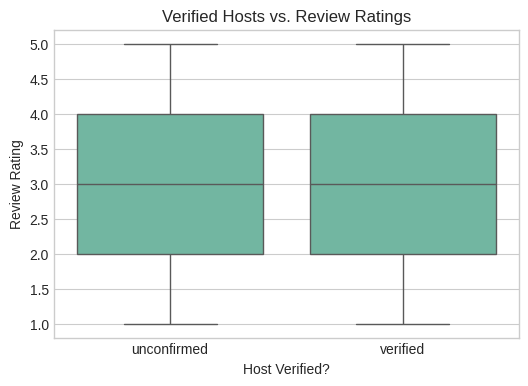

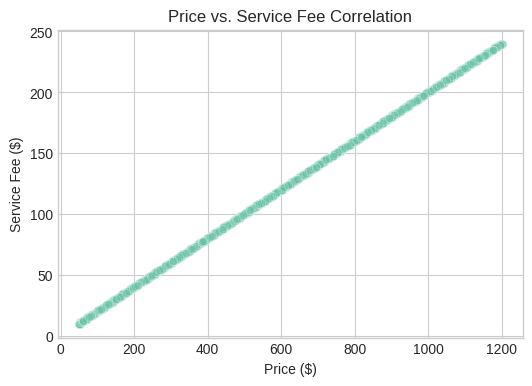

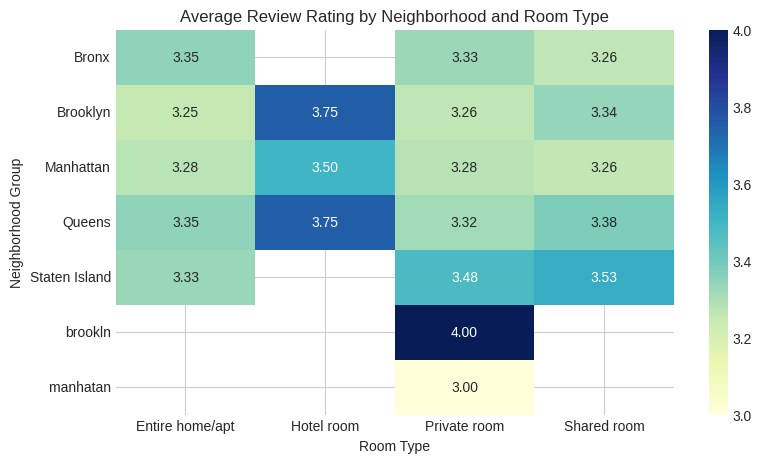

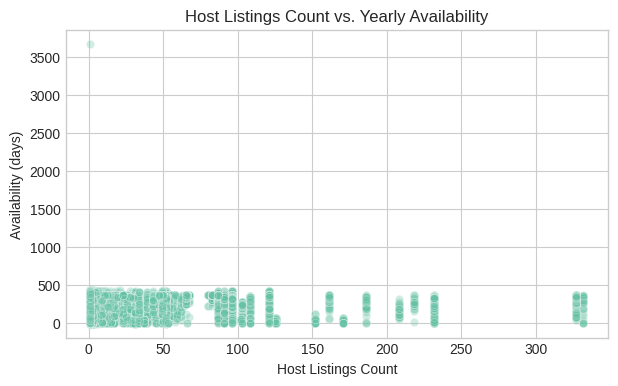


AIRBNB DATA SUMMARY INSIGHTS

Total Listings Analyzed: 102,026
 Most Common Neighborhood Group: Manhattan
Average Price: $625.37
Average Service Fee: $125.05
Average Review Rating: 3.28/5
Price–Service Fee Correlation: 1.00
Neighborhood with Highest Avg Price: Queens
Verified Host Avg Rating: 3.29 | Unverified: 3.27
Correlation between Host Listings Count & Availability: 0.16

Summary complete — plots and metrics generated successfully!


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')

# Specify the engine to handle potential file format issues
df = pd.read_excel("/content/1730285881-Airbnb_Open_Data.xlsx")
# # ensuring correct uploading of dataset
# print(df.head())

# Clean column names for easy reference
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
# Drop nulls in critical columns to avoid blank plots
df = df.dropna(subset=['price', 'review_rate_number'])

# === 1.Property Type Distribution ===
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='room_type', order=df['room_type'].value_counts().index)
plt.title("Distribution of Property Types")
plt.xlabel("Room Type"); plt.ylabel("Count")
plt.show()

# === 2️.Listings by Neighborhood Group ===
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='neighbourhood_group', order=df['neighbourhood_group'].value_counts().index)
plt.title("Number of Listings by Neighborhood Group")
plt.xlabel("Neighborhood Group"); plt.ylabel("Listings Count")
plt.show()

# === 3️.Average Price by Neighborhood Group ===
plt.figure(figsize=(7,4))
sns.barplot(data=df, x='neighbourhood_group', y='price', estimator='mean', errorbar=None)
plt.title("Average Price by Neighborhood Group")
plt.xlabel("Neighborhood Group"); plt.ylabel("Average Price ($)")
plt.show()

# === 4️.Construction Year vs. Price ===
plt.figure(figsize=(7,4))
sns.scatterplot(data=df, x='construction_year', y='price', alpha=0.4)
plt.title("Relationship Between Construction Year and Price")
plt.xlabel("Year Built"); plt.ylabel("Price ($)")
plt.show()

# === 5️.Top 10 Hosts by Listing Count ===
top_hosts = df['host_name'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_hosts.values, y=top_hosts.index)
plt.title("Top 10 Hosts by Number of Listings")
plt.xlabel("Number of Listings"); plt.ylabel("Host Name")
plt.show()

# === 6️.Verified Hosts vs. Review Ratings ===
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='host_identity_verified', y='review_rate_number')
plt.title("Verified Hosts vs. Review Ratings")
plt.xlabel("Host Verified?"); plt.ylabel("Review Rating")
plt.show()

# === 7️.Correlation: Price vs. Service Fee ===
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='price', y='service_fee', alpha=0.3)
plt.title("Price vs. Service Fee Correlation")
plt.xlabel("Price ($)"); plt.ylabel("Service Fee ($)")
plt.show()

corr = df[['price', 'service_fee']].corr().iloc[0,1]

# === 8️.Average Review by Neighborhood and Room Type ===
plt.figure(figsize=(9,5))
avg_reviews = df.groupby(['neighbourhood_group','room_type'])['review_rate_number'].mean().unstack()
sns.heatmap(avg_reviews, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Average Review Rating by Neighborhood and Room Type")
plt.xlabel("Room Type"); plt.ylabel("Neighborhood Group")
plt.show()

# === 9️.Host Listings Count vs. Availability ===
plt.figure(figsize=(7,4))
sns.scatterplot(data=df, x='calculated_host_listings_count', y='availability_365', alpha=0.3)
plt.title("Host Listings Count vs. Yearly Availability")
plt.xlabel("Host Listings Count"); plt.ylabel("Availability (days)")
plt.show()

# === 10️.Summary Insights ===
print("\n" + "="*60)
print("AIRBNB DATA SUMMARY INSIGHTS")
print("="*60)

print(f"\nTotal Listings Analyzed: {len(df):,}")
print(f" Most Common Neighborhood Group: {df['neighbourhood_group'].mode()[0]}")
print(f"Average Price: ${df['price'].mean():.2f}")
print(f"Average Service Fee: ${df['service_fee'].mean():.2f}")
print(f"Average Review Rating: {df['review_rate_number'].mean():.2f}/5")
print(f"Price–Service Fee Correlation: {corr:.2f}")

# Identify neighborhood with highest avg price
avg_price_by_neigh = df.groupby('neighbourhood_group')['price'].mean().idxmax()
print(f"Neighborhood with Highest Avg Price: {avg_price_by_neigh}")

# Verify if verified hosts perform better
verified = df[df['host_identity_verified']=='verified']['review_rate_number'].mean()
unverified = df[df['host_identity_verified']!='verified']['review_rate_number'].mean()
print(f"Verified Host Avg Rating: {verified:.2f} | Unverified: {unverified:.2f}")

# Availability vs listings trend summary
avail_corr = df[['calculated_host_listings_count','availability_365']].corr().iloc[0,1]
print(f"Correlation between Host Listings Count & Availability: {avail_corr:.2f}")

print("\nSummary complete — plots and metrics generated successfully!")